# Problem 1

In [55]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [56]:
hsedata = pd.read_csv('train.csv')

Number of outliers: SalePrice    61
dtype: int64


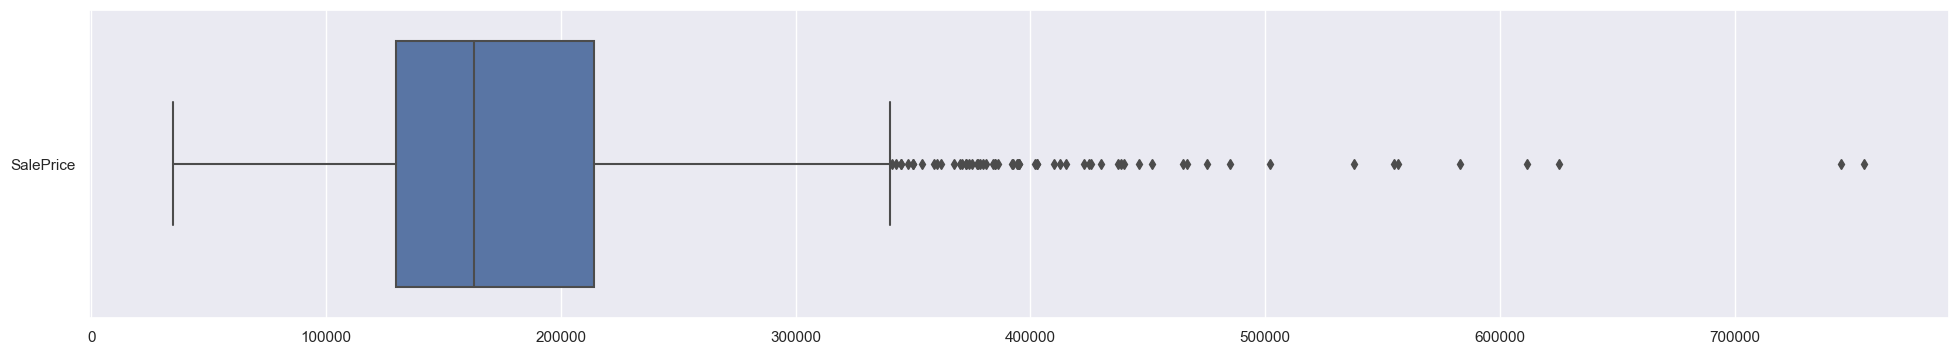

In [57]:
sale_data = pd.DataFrame(hsedata[["SalePrice"]])
fs = plt.figure(figsize=(24, 4))
sb.boxplot(data = sale_data, orient = "h")

q1 = np.percentile(sale_data, 25)
q3 = np.percentile(sale_data, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = (sale_data < lower_bound) | (sale_data > upper_bound)

num_outliers = np.sum(outliers)

print(f'Number of outliers: {num_outliers}')

Number of outliers: LotArea    69
dtype: int64


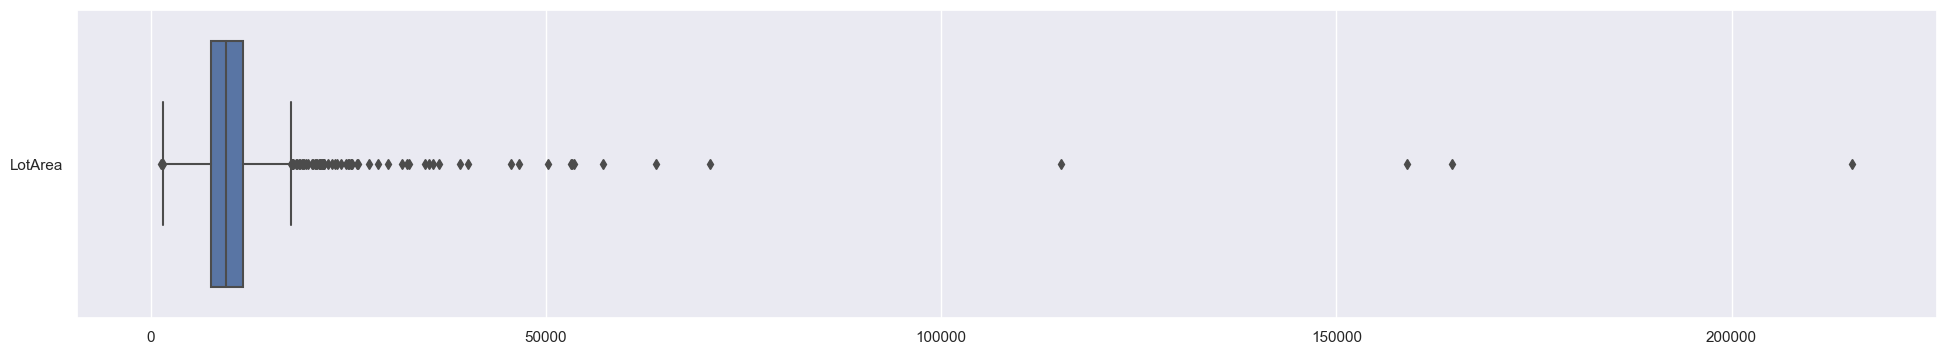

In [58]:
lot_data = pd.DataFrame(hsedata[["LotArea"]])
fl = plt.figure(figsize=(24, 4))
sb.boxplot(data = lot_data, orient = "h")

q1 = np.percentile(lot_data, 25)
q3 = np.percentile(lot_data, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = (lot_data < lower_bound) | (lot_data > upper_bound)

num_outliers = np.sum(outliers)

print(f'Number of outliers: {num_outliers}')

Number of outliers: GrLivArea    31
dtype: int64


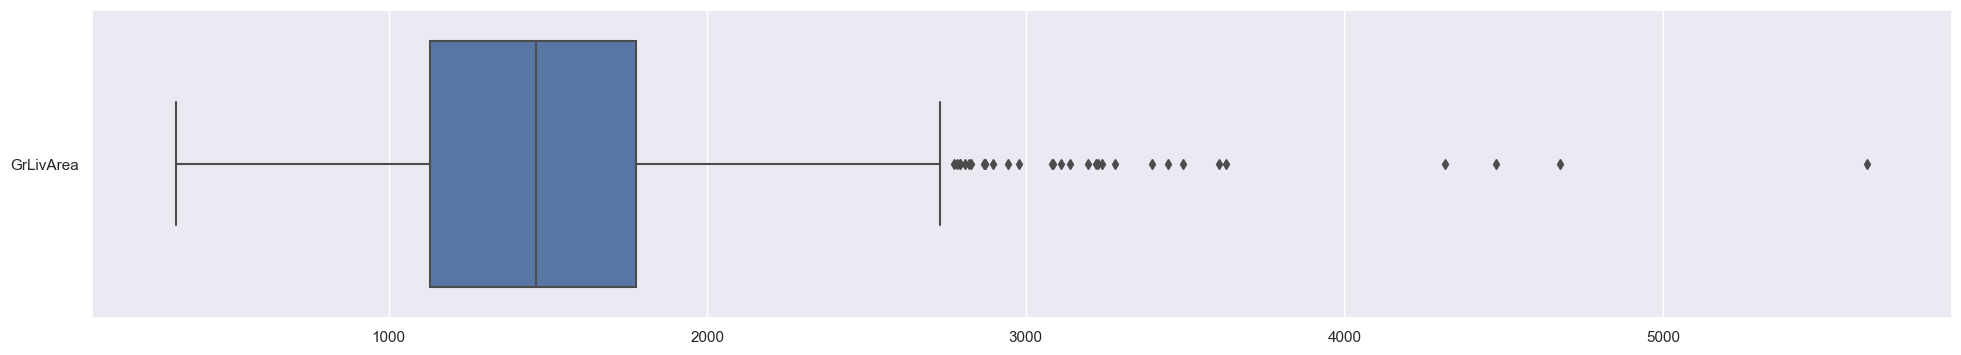

In [59]:
grliv_data = pd.DataFrame(hsedata[["GrLivArea"]])
fl = plt.figure(figsize=(24, 4))
sb.boxplot(data = grliv_data, orient = "h")

q1 = np.percentile(grliv_data, 25)
q3 = np.percentile(grliv_data, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = (grliv_data < lower_bound) | (grliv_data > upper_bound)

num_outliers = np.sum(outliers)

print(f'Number of outliers: {num_outliers}')

Number of outliers: TotalBsmtSF    61
dtype: int64


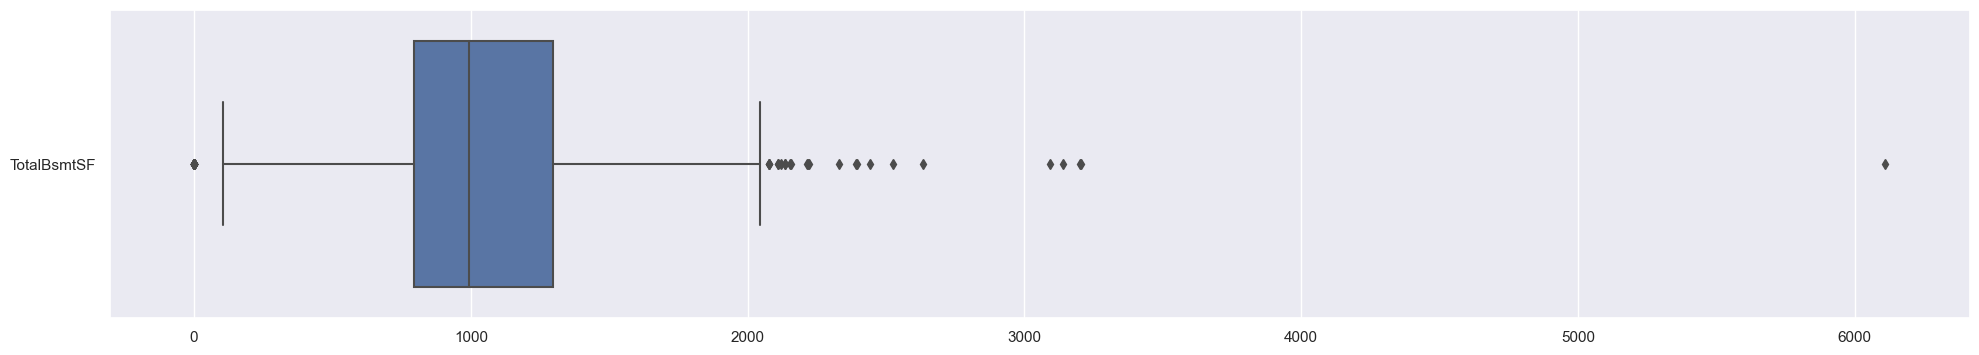

In [60]:
totalbsmtsf_data = pd.DataFrame(hsedata[["TotalBsmtSF"]])
fl = plt.figure(figsize=(24, 4))
sb.boxplot(data = totalbsmtsf_data, orient = "h")

q1 = np.percentile(totalbsmtsf_data, 25)
q3 = np.percentile(totalbsmtsf_data, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = (totalbsmtsf_data < lower_bound) | (totalbsmtsf_data > upper_bound)

num_outliers = np.sum(outliers)

print(f'Number of outliers: {num_outliers}')

Number of outliers: GarageArea    21
dtype: int64


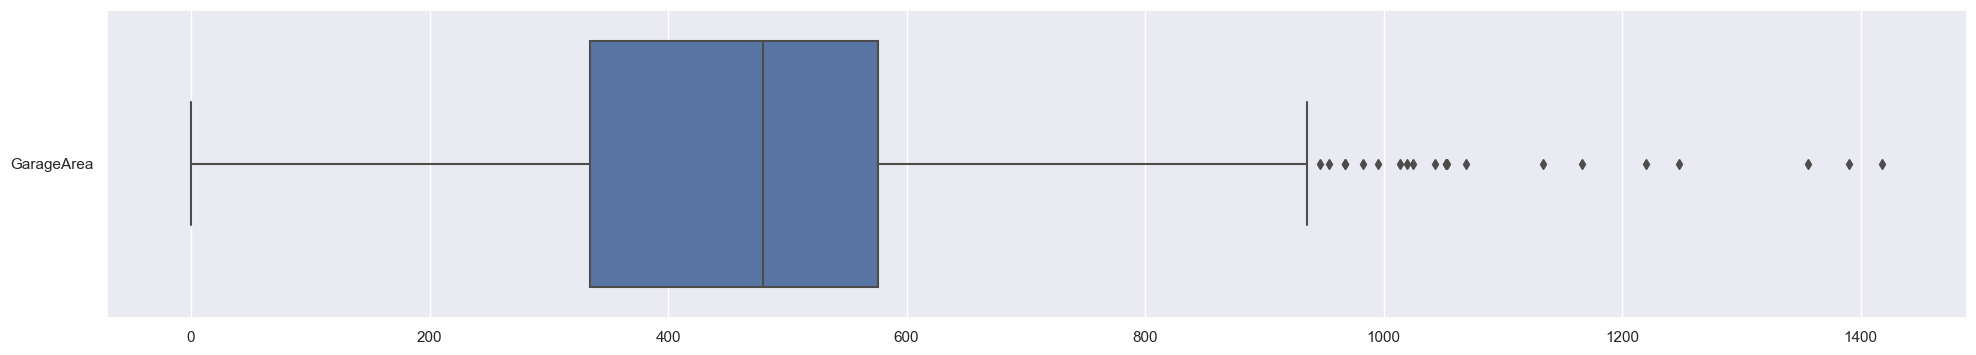

In [61]:
gararea_data = pd.DataFrame(hsedata[["GarageArea"]])
fl = plt.figure(figsize=(24, 4))
sb.boxplot(data = gararea_data, orient = "h")

q1 = np.percentile(gararea_data, 25)
q3 = np.percentile(gararea_data, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = (gararea_data < lower_bound) | (gararea_data > upper_bound)

num_outliers = np.sum(outliers)

print(f'Number of outliers: {num_outliers}')

In [62]:
'''Number of outliers: SalePrice    61
Number of outliers: LotArea    69
Number of outliers: GrLivArea    31
Number of outliers: TotalBsmtSF    61
Number of outliers: GarageArea    21'''
#(a)The variable that has the maximum number of outliers is LotArea & it has 69 outliers.  

'Number of outliers: SalePrice    61\nNumber of outliers: LotArea    69\nNumber of outliers: GrLivArea    31\nNumber of outliers: TotalBsmtSF    61\nNumber of outliers: GarageArea    21'

In [63]:
skewness = sale_data.skew()
print(f"Skewness:{skewness}")

Skewness:SalePrice    1.882876
dtype: float64


In [64]:
skewness = lot_data.skew()
print(f"Skewness:{skewness}")

Skewness:LotArea    12.207688
dtype: float64


In [65]:
skewness = grliv_data.skew()
print(f"Skewness:{skewness}")

Skewness:GrLivArea    1.36656
dtype: float64


In [66]:
skewness = totalbsmtsf_data.skew()
print(f"Skewness:{skewness}")

Skewness:TotalBsmtSF    1.524255
dtype: float64


In [67]:
skewness = gararea_data.skew()
print(f"Skewness:{skewness}")

Skewness:GarageArea    0.179981
dtype: float64


In [68]:
#(b)from the skewness index of each variable, we can see that LotArea is the most skewed and it is positively skewed.

In [69]:
jointDF = pd.concat([sale_data, lot_data,grliv_data,totalbsmtsf_data,gararea_data,], axis = 1).reindex(hsedata.index)

             SalePrice   LotArea  GrLivArea  TotalBsmtSF  GarageArea
SalePrice     1.000000  0.263843   0.708624     0.613581    0.623431
LotArea       0.263843  1.000000   0.263116     0.260833    0.180403
GrLivArea     0.708624  0.263116   1.000000     0.454868    0.468997
TotalBsmtSF   0.613581  0.260833   0.454868     1.000000    0.486665
GarageArea    0.623431  0.180403   0.468997     0.486665    1.000000


<Axes: >

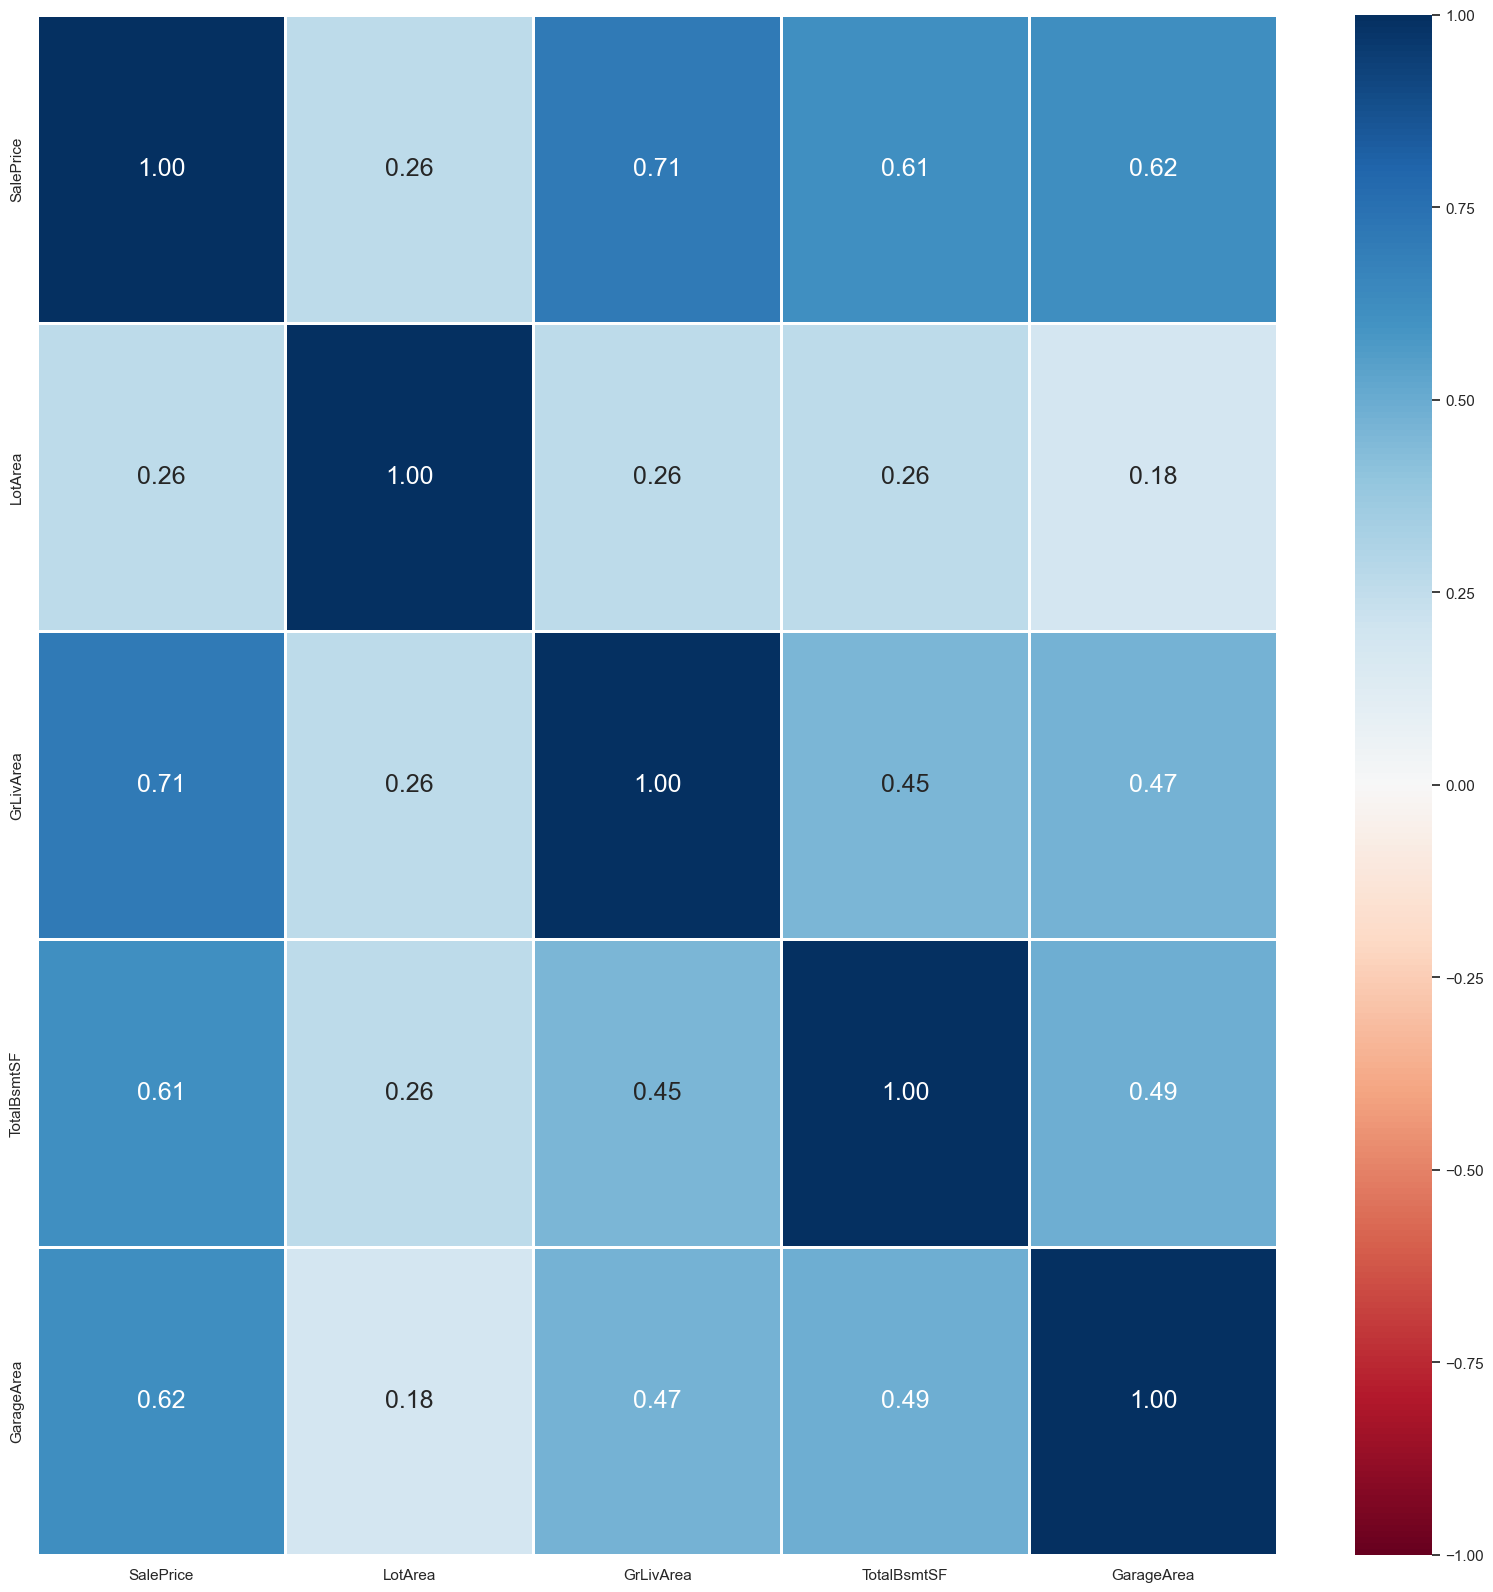

In [70]:
print(jointDF.corr())
f = plt.figure(figsize=(20, 20))
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [71]:
#(c)According to the heatmap, the two varibales with the strongest correalation with SalePrice are GrLivArea & GarageArea and hence those will help us the most

# Problem 2

In [72]:
ms_data=pd.DataFrame(hsedata[["MSSubClass"]])
print("Unique Levels of MSSubClass :", len(hsedata["MSSubClass"].unique()))

Unique Levels of MSSubClass : 15


In [73]:
neigh_data=pd.DataFrame(hsedata[["Neighborhood"]])
print("Unique Levels of Neighborhood :", len(hsedata["Neighborhood"].unique()))

Unique Levels of Neighborhood : 25


In [74]:
bldgt_data=pd.DataFrame(hsedata[["BldgType"]])
print("Unique Levels of BldgType :", len(hsedata["BldgType"].unique()))

Unique Levels of BldgType : 5


In [75]:
oqual_data=pd.DataFrame(hsedata[["OverallQual"]])
print("Unique Levels of OverallQual :", len(hsedata["OverallQual"].unique()))

Unique Levels of OverallQual : 10


In [76]:
#Since Neighbourhood has the most levels,

neigh_counts = neigh_data['Neighborhood'].value_counts()

print("Unique Levels of Neighborhood:", len(neigh_counts))
print("Levels and the Number of Data Points for Each Level:")
print(neigh_counts)

Unique Levels of Neighborhood: 25
Levels and the Number of Data Points for Each Level:
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


In [77]:
#(a)Hence,the variable with the highest number of levels is Neighbourhood and the level that has the most house is NAmes

In [78]:
jointDF2 = pd.concat([sale_data,ms_data,neigh_data,bldgt_data,oqual_data,], axis = 1).reindex(hsedata.index)

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

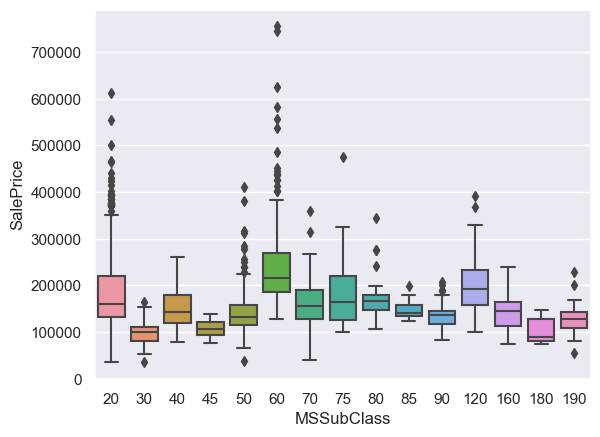

In [79]:
sb.boxplot(x='MSSubClass', y='SalePrice', data=jointDF2)

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

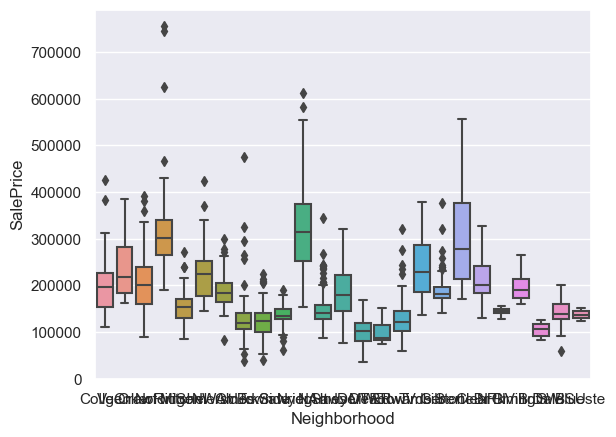

In [80]:
sb.boxplot(x='Neighborhood', y='SalePrice', data=jointDF2)

<Axes: xlabel='BldgType', ylabel='SalePrice'>

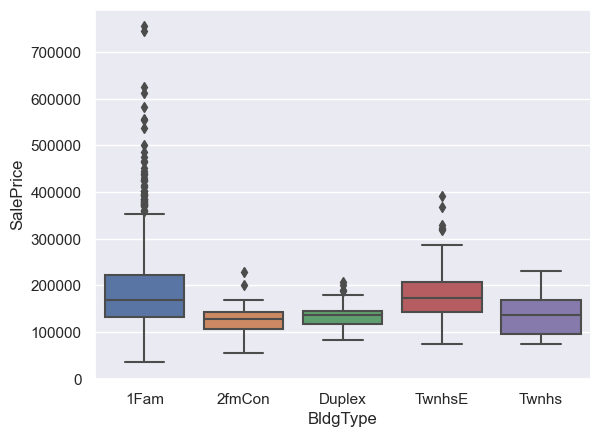

In [81]:
sb.boxplot(x='BldgType', y='SalePrice', data=jointDF2)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

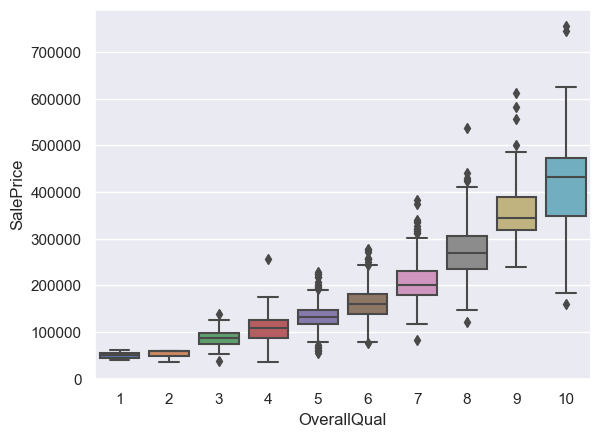

In [82]:
sb.boxplot(x='OverallQual', y='SalePrice', data=jointDF2)

In [83]:
#(b)According to the boxplots of each categorical data against SalePrice, BldgType and OverallQual will help the most

# Problem 3 (b)

In [84]:
#Calculate the difference between the YrSold and YearRemodAdd to create a variable representing how recently the house was remodeled
hsedata['Remodel_Recency'] = hsedata['YrSold'] - hsedata['YearRemodAdd']

Text(0, 0.5, 'SalePrice')

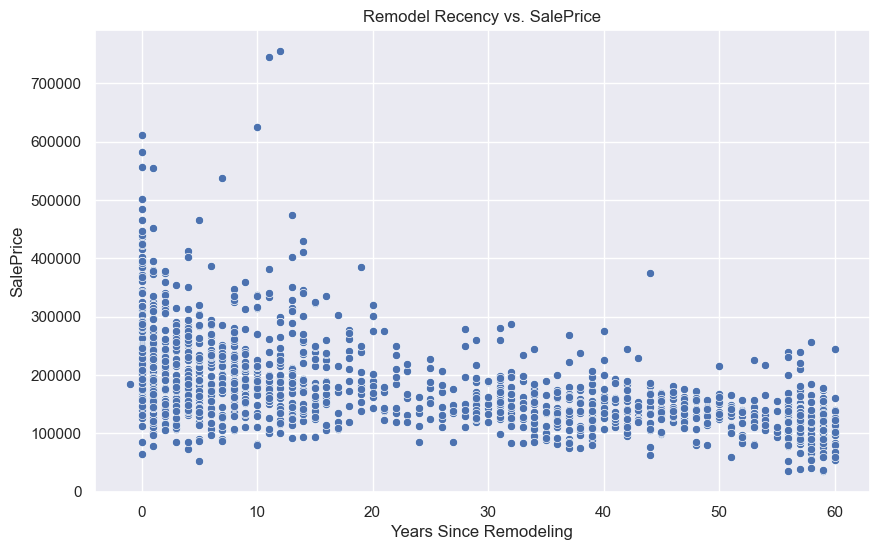

In [85]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x='Remodel_Recency', y='SalePrice', data=hsedata)
plt.title('Remodel Recency vs. SalePrice')
plt.xlabel('Years Since Remodeling')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

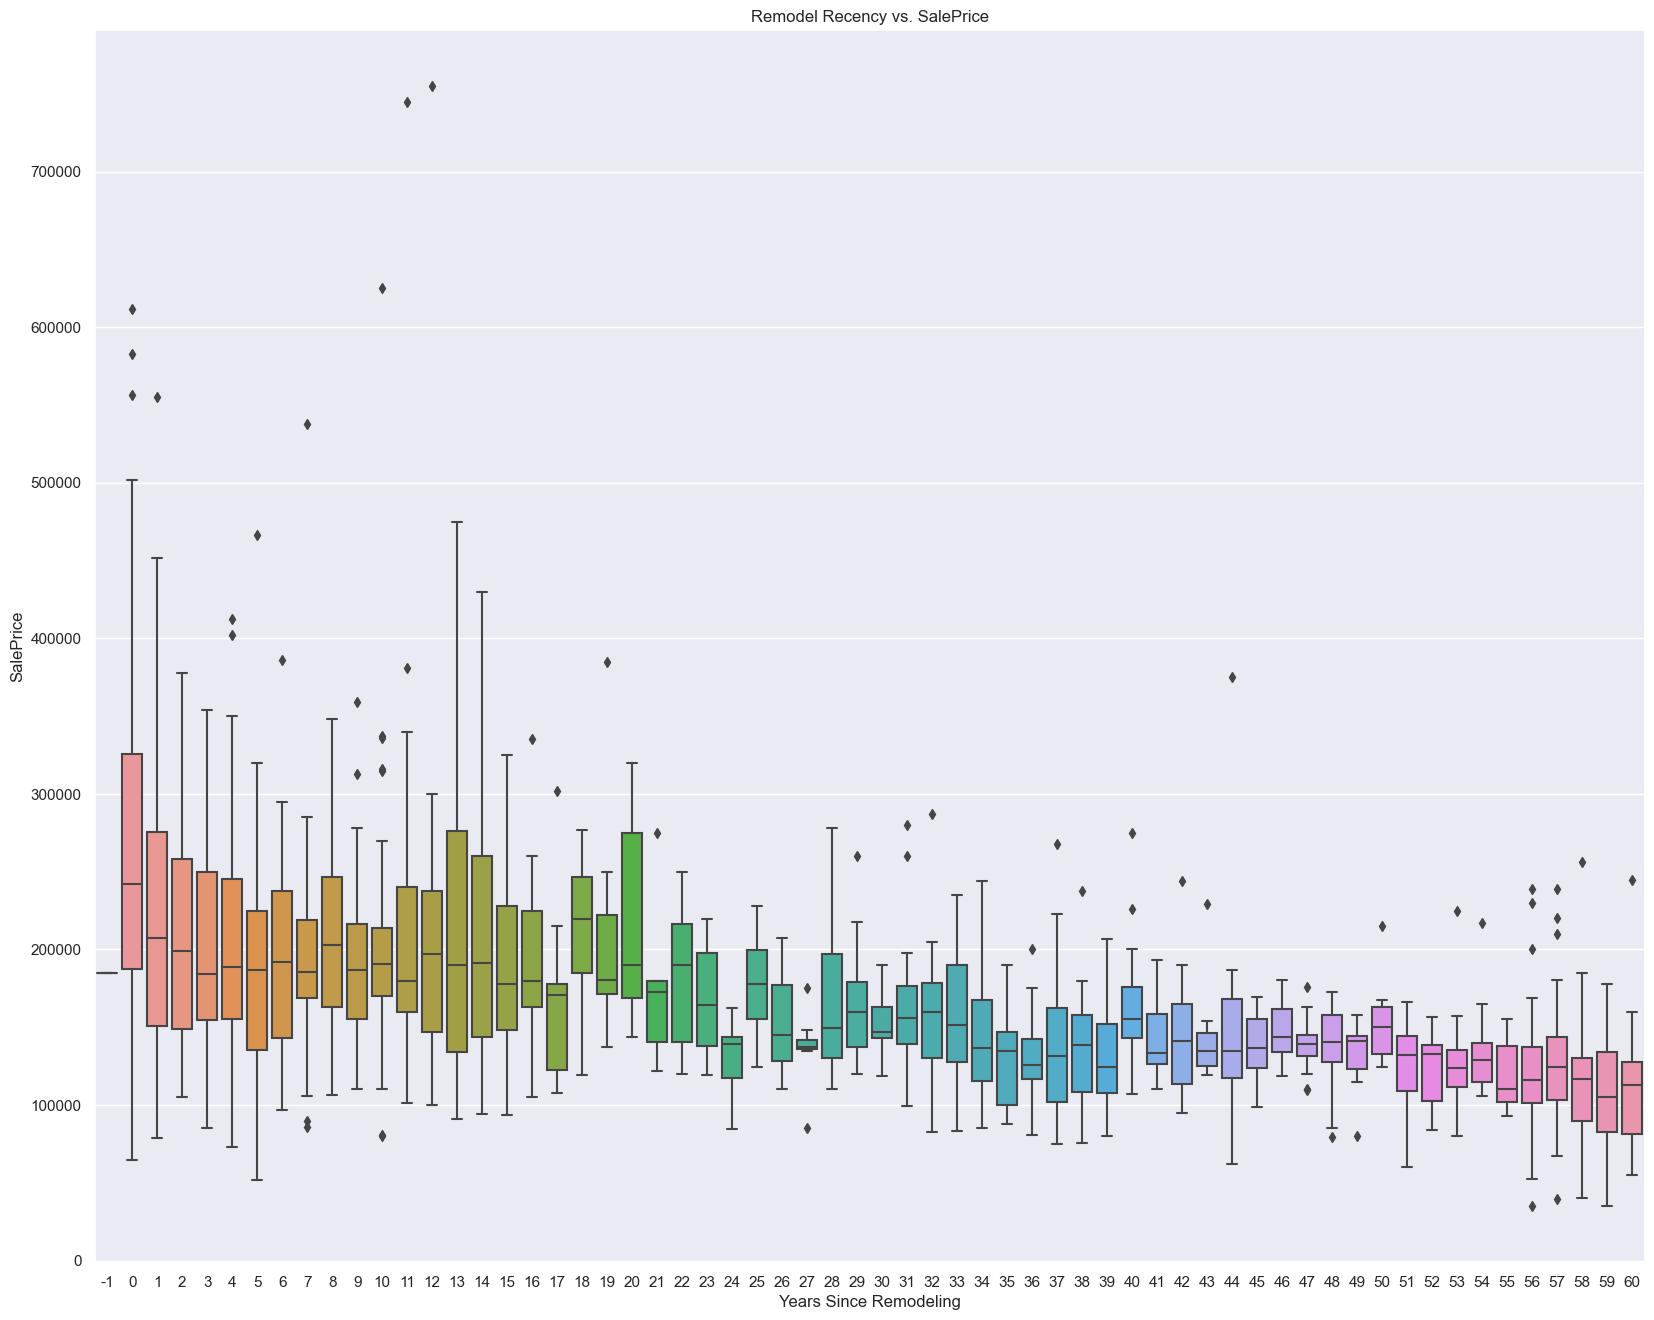

In [86]:
plt.figure(figsize=(20, 16))
sb.boxplot(x='Remodel_Recency', y='SalePrice', data=hsedata)
plt.title('Remodel Recency vs. SalePrice')
plt.xlabel('Years Since Remodeling')
plt.ylabel('SalePrice')

In [50]:
#By conducting EDA, we observe that the fewer the years since remodeling, the higher the sale price. This can be seen in the boxplot as there seems to be decreasing linear trend of the median and overall plots.